<a href="https://colab.research.google.com/github/crislpzalc/Fashion-MNIST-Logistic-Regression/blob/main/Fashion_MNIST_Zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [ ]:
import os

# show the files in the path
for file in os.listdir(path):
    print(file)

train-images-idx3-ubyte
fashion-mnist_train.csv
train-labels-idx1-ubyte
fashion-mnist_test.csv
t10k-labels-idx1-ubyte
t10k-images-idx3-ubyte


In [ ]:
pip install idx2numpy

In [ ]:
import idx2numpy

# Load images and labels
train_images_path = f"{path}/train-images-idx3-ubyte"
train_labels_path = f"{path}/train-labels-idx1-ubyte"
test_images_path = f"{path}/t10k-images-idx3-ubyte"
test_labels_path = f"{path}/t10k-labels-idx1-ubyte"

# Convert them into numpy
X_train = idx2numpy.convert_from_file(train_images_path)
y_train = idx2numpy.convert_from_file(train_labels_path)
X_test = idx2numpy.convert_from_file(test_images_path)
y_test = idx2numpy.convert_from_file(test_labels_path)

# Verify dimensions
print("Dimensions X_train:", X_train.shape)  # should be (60000, 28, 28)
print("Dimensions y_train:", y_train.shape)  # should be (60000,)
print("Dimensions X_test:", X_test.shape)    # should be (10000, 28, 28)
print("Dimensions y_test:", y_test.shape)    # should be (10000,)

Dimensions X_train: (60000, 28, 28)
Dimensions y_train: (60000,)
Dimensions X_test: (10000, 28, 28)
Dimensions y_test: (10000,)


Once we have the data loaded, we start exploring it.

# Explore Data

## Initial Inspection of data

The first step is make an initial inspection of the data and verify if everything is okay.

In [ ]:
# verify unique labels
import numpy as np

print("Unique classes in y_train:", np.unique(y_train))  # should be from 0 to 9
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique classes in y_test: [0 1 2 3 4 5 6 7 8 9]


The labels are:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot





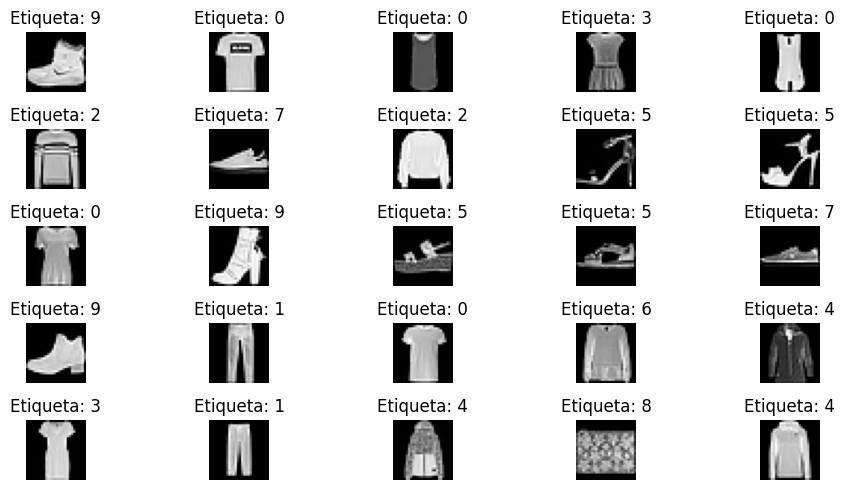

In [ ]:
# check if images are correctly linked with labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# verify value of the pixels
print("Minumun value of pixel:", X_train.min())  # should be 0
print("Maximun value of pixel:", X_train.max())  # should be 255

Minumun value of pixel: 0
Maximun value of pixel: 255


## Normalization

We will scale the pixels from 0-255 to 0-1

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("New minumun value mínimo of pixel:", X_train.min())  # should be 0.0
print("New minumun value mínimo of pixel:", X_train.max())  # should be 1.0

New minumun value mínimo of pixel: 0.0
New minumun value mínimo of pixel: 1.0


## Flatten images

Scikit-Learn doesn't support data in 2D format

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)  # From (60000, 28, 28) to (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)    # From (10000, 28, 28) to (10000, 784)

print("New dimensions of X_train:", X_train.shape)
print("New dimensions of X_test:", X_test.shape)


New dimensions of X_train: (60000, 784)
New dimensions of X_test: (10000, 784)


# Division of DataSet

In [ ]:
from sklearn.model_selection import train_test_split

# Divide data set for training and testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_val:", X_val.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of y_val:", y_val.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of X_train: (48000, 784)
Dimensions of X_val: (12000, 784)
Dimensions of y_train: (48000,)
Dimensions of y_val: (12000,)
Dimensions of X_test: (10000, 784)
Dimensions of y_test: (10000,)


# Select a Model

As it's a classfication problem, we can choose **Logistic Regression Model**, assuming there's a linear relationship between the pixels and the probabilities of each class.

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# create a model with initial parameters
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# max_iter in 1000 iteration forr the moment
# solver in Limited-memory Broyden-Fletcher-Goldfarb-Shanno for the moment, eficient with multi-characteristic problems
# multi_class in multinomial, efficient with multi class problem (this has 10 classes)

### Train Model

In [ ]:
model.fit(X_train, y_train)
print("Training completed.")


Training completed.


### Evaluate Model

First, we are going to evaluate the model with the validation set.

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy in validation: {val_accuracy}")

Accuracy in validation: 0.8505833333333334


An 85% of accuracy is a good result for the first time taking into account that this model has 10 different classes, however we can make it better. Let's analyze in a deeper way.

Look if there are specific classes that the model does not classify well.

In [ ]:
from sklearn.metrics import classification_report

print("Report of classification in validation:")
print(classification_report(y_val, y_val_pred))

Report of classification in validation:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1202
           1       0.98      0.96      0.97      1219
           2       0.76      0.75      0.75      1205
           3       0.84      0.88      0.86      1184
           4       0.74      0.78      0.76      1202
           5       0.94      0.94      0.94      1211
           6       0.64      0.58      0.61      1218
           7       0.92      0.93      0.92      1159
           8       0.95      0.93      0.94      1197
           9       0.95      0.95      0.95      1203

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



As we can see, there are some classes that have a lower accuracy, such as clases 6, 4, 2 and 0. But, let's go deeper into it.

Look how many times the model correctly predicted each class and how many times it was wrong with the confusion matrix.

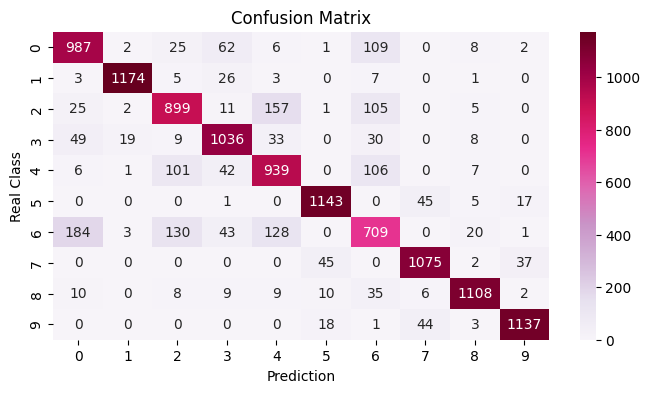

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val, y_val_pred)

# Visualize it
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Prediction")
plt.ylabel("Real Class")
plt.title("Confusion Matrix")
plt.show()

As we can see the most problematic class in the number 6.
Key observations:
  - Low F1-Score in class 6: This indicates that the
   model has problems in correctly predicting this class.
  - Class 6 (row 6 in the matrix) has many confounds with other classes:
    - 184 images in class 6 were classified as class 0.
    - 130 images were classified as class 2.
    - 128 images were classified as class 4.

Let's try to solve it.

### Adjust Model

#### Cross Validation

We'll use cross_val_score to make a cross validation of 5 partitions.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Accuracy in each partition:", cv_scores)
print("Average accuracy:", cv_scores.mean())


Accuracy in each partition: [0.85520833 0.85354167 0.8484375  0.84489583 0.85145833]
Average accuracy: 0.8507083333333332


#### GridSearchCV

We'll adjust key hiperparraments ,such us C, to optimize performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Combinations of hiperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Adjust the model
grid_search.fit(X_train, y_train)

# Results
print("Best hiperparameters:", grid_search.best_params_)
print("Best average accuracy:", grid_search.best_score_)


Best hiperparameters: {'C': 0.1}
Best average accuracy: 0.8552083333333335


Train the data with the new model

In [ ]:
# Best model found by GridSearchCV
best_model = grid_search.best_estimator_

y_val_pred = best_model.predict(X_val)
print("Accuracy in validation of the best model:", accuracy_score(y_val, y_val_pred))

Accuracy in validation of the best model: 0.8539166666666667


We still have 85% of accuracy, so let's analyze it again.

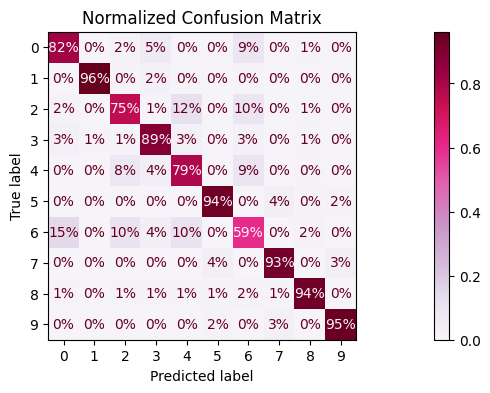

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp=ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, normalize="true", values_format=".0%", cmap="PuRd")

# adjust size
fig = disp.figure_
fig.set_figwidth(20)
fig.set_figheight(4)

plt.title("Normalized Confusion Matrix")
plt.show()


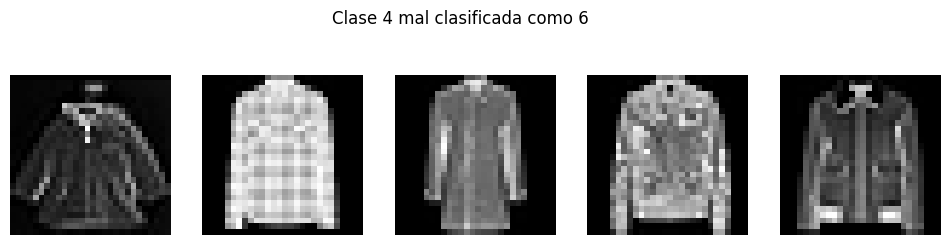

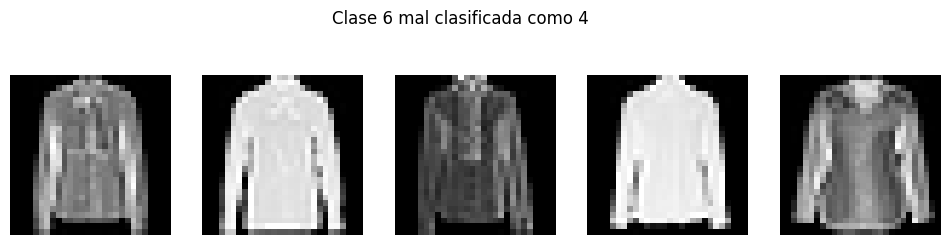

In [ ]:
import numpy as np

# Identificar ejemplos mal clasificados
class_a, class_b = 4, 6  # Cambiar a las clases que desees analizar
misclassified_a_b = X_val[(y_val == class_a) & (y_val_pred == class_b)]
misclassified_b_a = X_val[(y_val == class_b) & (y_val_pred == class_a)]

# Función para graficar ejemplos
def plot_images(images, title):
    if len(images) == 0:
        print(f"No hay ejemplos para {title}")
        return
    fig, axes = plt.subplots(1, min(len(images), 5), figsize=(12, 3))
    fig.suptitle(title)
    for img, ax in zip(images[:5], axes):
        ax.imshow(img.reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()

# Visualizar imágenes mal clasificadas
plot_images(misclassified_a_b, f"Clase {class_a} mal clasificada como {class_b}")
plot_images(misclassified_b_a, f"Clase {class_b} mal clasificada como {class_a}")


The classes are quite similar and the Logistic Regression Model is linear, so maybe it's very simple for this data set.

## Random Forest Model

This model is more advanced and is no linear, so let's try if it fits better for this data set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

### Train Model

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

### Evaluate Model

In [ ]:
y_val_pred_rf = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Accuracy in validation: {val_accuracy}")

Accuracy in validation: 0.8505833333333334


Random Forest Model also achieves 85% accuracy, so we are probably reaching the limit of what traditional models (such as Random Forest or Logistic Regression) can achieve with the data in its current state. This occurs because:
- The problem classes (jackets and shirts, for example) are visually very similar.
- The model is not capturing complex relationships needed to distinguish those classes.

# Evaluate the model with Test Set

Logistic Regression was chosen as the final model due to its slightly better performance compared to Random Forest and because it has already been fine-tuned using a hyperparameter search. While neural networks could potentially achieve better results, this project focuses on traditional models as part of an initial learning approach to machine learning. The test set evaluation completes this basic pipeline, reflecting a practical and structured workflow.

In [ ]:
y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of test set: {test_accuracy:.4f}")


Accuracy of test set: 0.8439


The accuracy of the test set (84.39%) is slightly lower than the validation accuracy, which is expected due to the unseen nature of the test data. This result demonstrates that the logistic regression model generalizes reasonably well to new data, considering the inherent limitations of linear models for image classification.

In [ ]:
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.73      0.73      0.73      1000
           3       0.84      0.87      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.62      0.56      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Classification Report Analysis
The classification report shows that while the overall accuracy is 84%, there are significant differences in performance across classes:
- **Class 6 (shirts)** has the lowest F1-score (0.59) due to visual similarity with other classes like jackets (class 4).
- **Class 1 (shoes)** has the highest F1-score (0.97), likely because it is visually distinct from other classes.

This highlights the model's limitation in handling visually similar classes, which is expected for linear models like logistic regression.


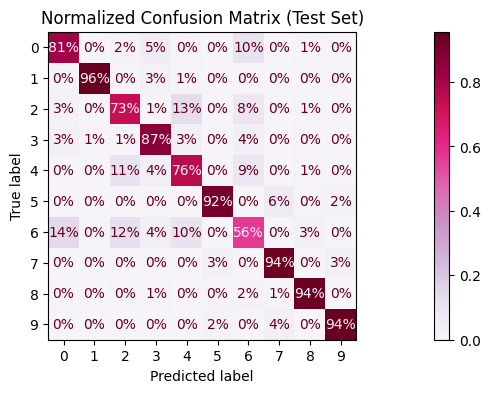

In [ ]:
disp1 = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".0%", cmap="PuRd")

# adjust size
fig = disp1.figure_
fig.set_figwidth(20)
fig.set_figheight(4)

plt.title("Normalized Confusion Matrix (Test Set)")
plt.show()

### Confusion Matrix Analysis
The confusion matrix reveals specific challenges:
- **Class 6 (shirts)** and **Class 4 (jackets)** are often confused, with 12% of shirts misclassified as jackets.
- **Class 4 (jackets)** also shows misclassifications with **Class 2 (pullovers)**.

These confusions are likely due to the visual similarity of these clothing items, which a linear model like logistic regression struggles to separate.


# Final Remarks
This project aimed to classify images of clothing from the Fashion MNIST dataset using traditional machine learning methods. Logistic regression, chosen as the final model after hyperparameter tuning, achieved an accuracy of 84% on the test set.

### Key Findings
1. The model performs well on distinct classes like shoes (Class 1) and ankle boots (Class 9).
2. Performance drops significantly for visually similar classes like shirts (Class 6) and jackets (Class 4).
3. Logistic regression, as a linear model, has inherent limitations in handling complex patterns in image data.

### Next Steps
To address these limitations, future work will focus on implementing convolutional neural networks (CNNs), which are better suited for image classification tasks. This will allow the model to learn and distinguish more nuanced visual features between classes.
